In [ ]:
import pandas as pd
import requests
import os
import gtfs_realtime_pb2
import datetime
from time import strftime, localtime
from protobuf_to_dict import protobuf_to_dict
from datetime import datetime
import math
from datetime import datetime
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from matplotlib import pyplot as plt 
from sklearn.linear_model import SGDRegressor

In [ ]:
df = pd.read_csv('C:/Users/jcele/Desktop/arrival_time/analysis-/gathered_data/new_df')

In [ ]:

new_df = df.drop_duplicates(subset=['time_stamp', 'trip_id'])



# num_rows = len(new_df)
# print("Number of rows using len():", num_rows)

In [ ]:
new_df.head

In [15]:
# Create dummy variables for the 'day_of_week' column
day_of_week_dummies = pd.get_dummies(new_df['day_of_week'], prefix='day')

# Concatenate the dummy variables with the original DataFrame
new_df_with_dummies = pd.concat([new_df, day_of_week_dummies], axis=1)

# Drop the original 'day_of_week' column and the 'start_date' column (if needed)
new_df_with_dummies.drop(['day_of_week', 'start_date'], axis=1, inplace=True)

X = new_df_with_dummies.drop(['delay', 'time_stamp'], axis=1)  # Input features - adjust columns as needed
y = new_df_with_dummies['delay']  # Target variable


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)  # Adjust test_size and random_state as desired

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 92799.96640906898


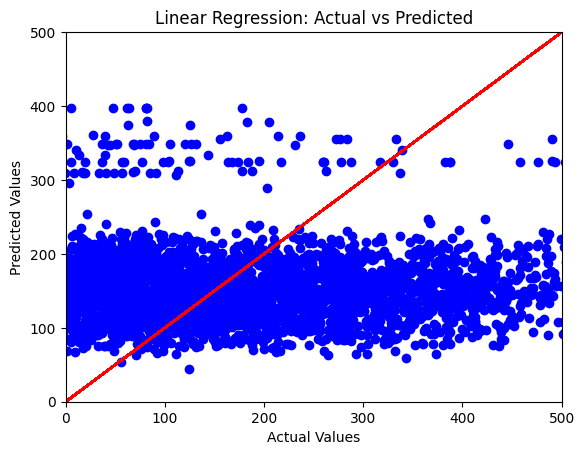

In [22]:
# Plot the predicted values vs actual values
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test, y_test, color='red')  # Plot a diagonal line representing perfect predictions
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted')

# Set the limits for the x and y axes
plt.xlim(0, 300)
plt.ylim(0, 300)
plt.show()